In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.stats as sps
from scipy.special import ndtr
from scipy.special import kolmogorov
from scipy.special import kolmogi

#### Сгенерьте выборку ${X}$ из $X_{i} \sim \mathcal{N}(0,1)$ размера 1000

In [2]:
n = 1000 #sample size
N= 1000 #number of samples
X = np.random.standard_normal(n)

#### Преобразуйте эту формулу $${D}_{n} = \sup_{{x}\in {\mathbb{R}}}{|{F_{n}(x)}-{F(x)}|}$$ так, чтобы получился максимум по конечному множеству:

#### $${D}_{n} = \max_{{x}\in {{X}}}{|{F_{n}(x)}-{F(x)}|}$$

In [3]:
def D_n_old(n):
    def D(X):
        Fn = sps.ecdf(X[:n]).cdf
        F = ndtr
        res = max(np.absolute(Fn.evaluate(X)-F(X)))
        return res
    return D

#### или же: $${D}_{n} = \max_{ {{1\le k \le n}}}{\max{\lbrace{\frac{k}{n}-F({X_{(k)}), F({X_{(k)}})-\frac{k-1}{n}}}\rbrace}}$$

In [4]:
def D_n(n):
    def D(X):
        sortedX_n = np.sort(X[:n])
        F = ndtr
        res = np.max(list(map(lambda x: max((x[0]+1)/n - F(x[1]), F(x[1])-x[0]/n), np.array(list(enumerate(sortedX_n))))))
        return res
    return D

#### Доказательство:

In [5]:
D_n_old(n)(X), D_n(n)(X)

(0.02285422149157451, 0.023854221491574512)

Ч.Т.Д

#### Постройте график зависимости ${D_{n}}$ от $ {n}$ при $1\le n\le 1000$

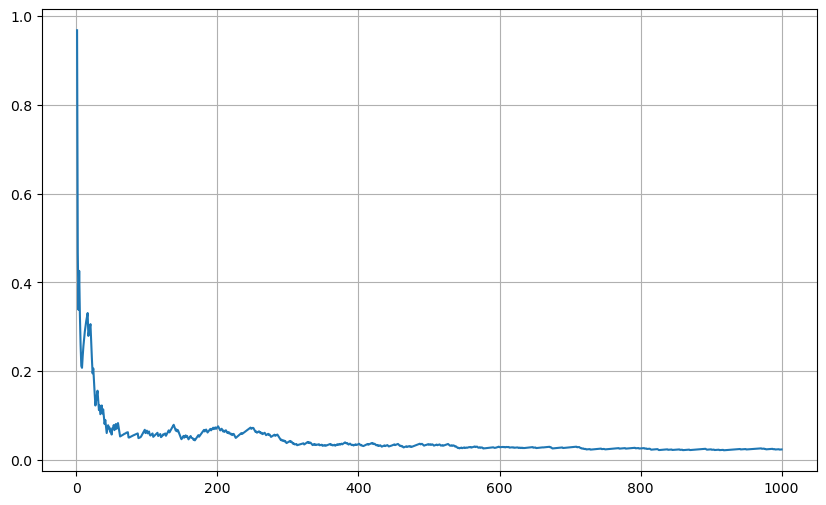

In [6]:
n_arr = np.arange(1, n+1)
vD_n = np.array(np.vectorize(D_n)(n_arr))
Dn_vals = np.array(list(map(lambda vdn: vdn(X), vD_n)))
f, (ax) = plt.subplots(1,1, figsize = (10, 6))
ax.plot(n_arr, Dn_vals)
ax.grid()
None

#### Верно ли, что у последовательности ${D_{n}}$ есть предел? Если да, то чему он равен и как назвывается соответсвующий вид сходимости?

* Да, есть.
* 0, Теорема Гливенко-Кантелли
* Почти наверное

#### Найдите с помощью выборки приближенное значение $\mathrm P(\sqrt{n}{D_{n} \le x})$ при ${x} \in {{[-1,10]}}$ и постройте график ее зависимости

In [7]:
X = np.array([sps.norm.rvs(loc=0, scale=1, size=n) for _ in range (N+1)])
Dn_sample = np.array(list(map(D_n(n), X))) #sample of N D_1000 values

In [8]:
def P(x):
    return (np.sqrt(n)*Dn_sample <= x).mean()

In [9]:
x = np.linspace(start = -1, stop = 10, num =1000)   #patrition of [-1, 10]
x.shape
p =np.array(list(map(P, x)))
kol_val = kolmogorov(x)

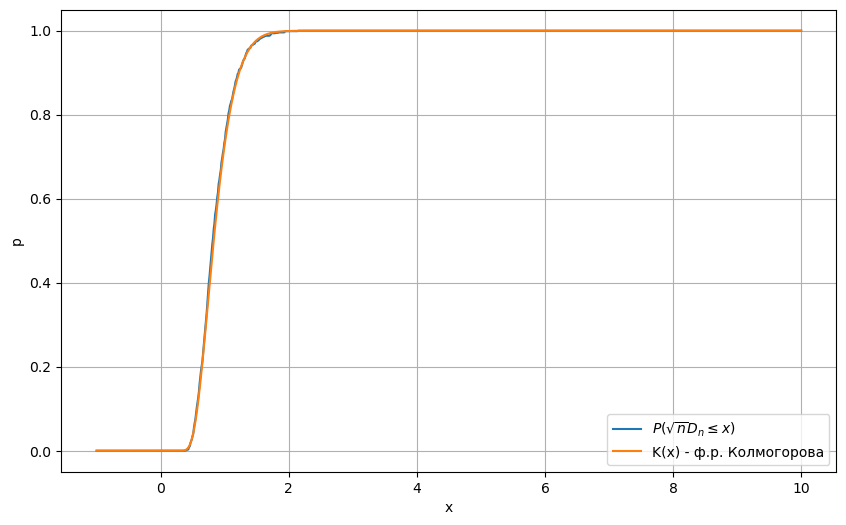

In [11]:
f, (ax) = plt.subplots(1, 1, figsize=(10,6))
line1,  = ax.plot(x, p, label = "line1")
line2,  = ax.plot(x, 1-kol_val, label = "line2")
ax.legend((line1, line2), [r'$P(\sqrt{n}D_{n} \leq x)$', r'K(x) - ф.р. Колмогорова'])
ax.set_xlabel("x")
ax.set_ylabel("p")
ax.grid()
None